pip install "numpy<1.24.0" --user

In [1]:
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt  

from sklearn import datasets

iris = datasets.load_iris()
X_w = iris.data[:, :2]   
y_w = iris.target         

X = iris.data[:, :2]   
y = iris.target         

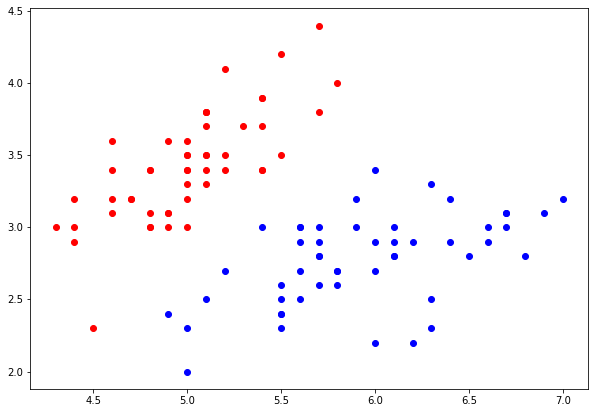

In [2]:
X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline            
plt.figure(figsize=(10,7))   
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7,stratify=y)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [4]:
from sklearn.svm import SVC

svm_inst = SVC(kernel='linear', random_state=7)
svm_inst.fit(X_train_2,y_train_2)

SVC(kernel='linear', random_state=7)

In [5]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 7).fit(X_train_2, y_train_2)

In [6]:
from sklearn.metrics import accuracy_score

svc_pred = svm_inst.predict(X_test_2)
lr_pred = lr_clf.predict(X_test_2)

print("Accuracy of SVC:",accuracy_score(y_test_2,svc_pred))
print("Accuracy of LR:",accuracy_score(y_test_2,lr_pred))

Accuracy of SVC: 0.8214285714285714
Accuracy of LR: 0.7857142857142857


Text(0.5, 1.0, 'Linear Regression')

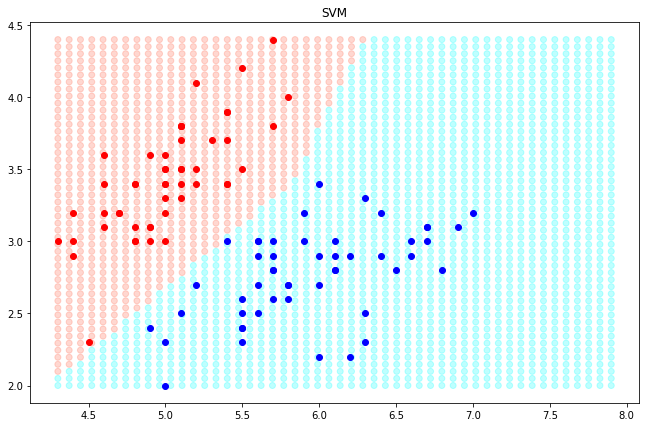

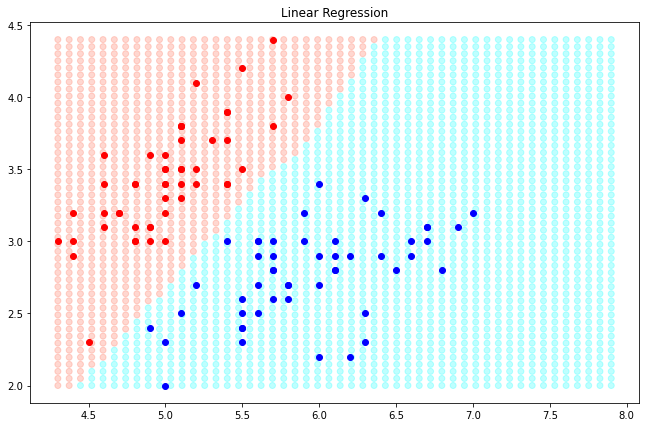

In [7]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = lr_clf.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline
fig = plt.figure(figsize=(24,7))
ax1 = fig.add_subplot(1, 2, 1)

#colors = np.array(['aqua', 'aqua', 'rose'])
colors = np.array(['tomato', 'aqua', 'aqua'])

#colors = np.array(['r', 'b'])
ax1.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
#ax1.scatter(X[:, 0], X[:, 1], color=colors[y])

ax1.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax1.scatter(X_1[:,0],X_1[:,1], color = 'blue')

plt.title("SVM")

#Predictions on the grid
test_preds = svm_inst.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

fig = plt.figure(figsize=(24,7))
ax2 = fig.add_subplot(1, 2, 1)

ax2.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
#ax2.scatter(X[:, 0], X[:, 1], color=colors[y])
ax2.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax2.scatter(X_1[:,0],X_1[:,1], color = 'blue')

plt.title("Linear Regression")


In [8]:
from sklearn.model_selection import cross_val_score

svc_scores = cross_val_score(svm_inst, X_train_2, y_train_2, cv=4)
svc_scores
print("Average SVC scores: ", svc_scores.mean())
print("Standard Deviation of SVC scores: ", svc_scores.std())

Average SVC scores:  0.7857142857142857
Standard Deviation of SVC scores:  0.07142857142857144


In [10]:
print(svc_scores)

[0.9047619  0.76190476 0.76190476 0.71428571]


In [9]:
lr_scores = cross_val_score(lr_clf, X_train_2, y_train_2, cv=10)
lr_scores
print("Average LR scores: ", lr_scores.mean())
print("Standard Deviation of LR scores: ", lr_scores.std())

Average LR scores:  0.7944444444444445
Standard Deviation of LR scores:  0.1254313544986182


In [12]:
print(lr_scores)

[0.88888889 1.         0.77777778 0.77777778 0.625      0.875
 0.625      0.875      0.875      0.625     ]
